In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Data_preprocess as preprocess
from lregression import LogisticRegression
import k_fold_crossv
plt.rcParams.update({'figure.max_open_warning': 0})

## 1. Data Processing

In [2]:
content =pd.read_csv(**preprocess.adult_data_config).dropna()

In [3]:
content #print content

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


C:\Users\fandi\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


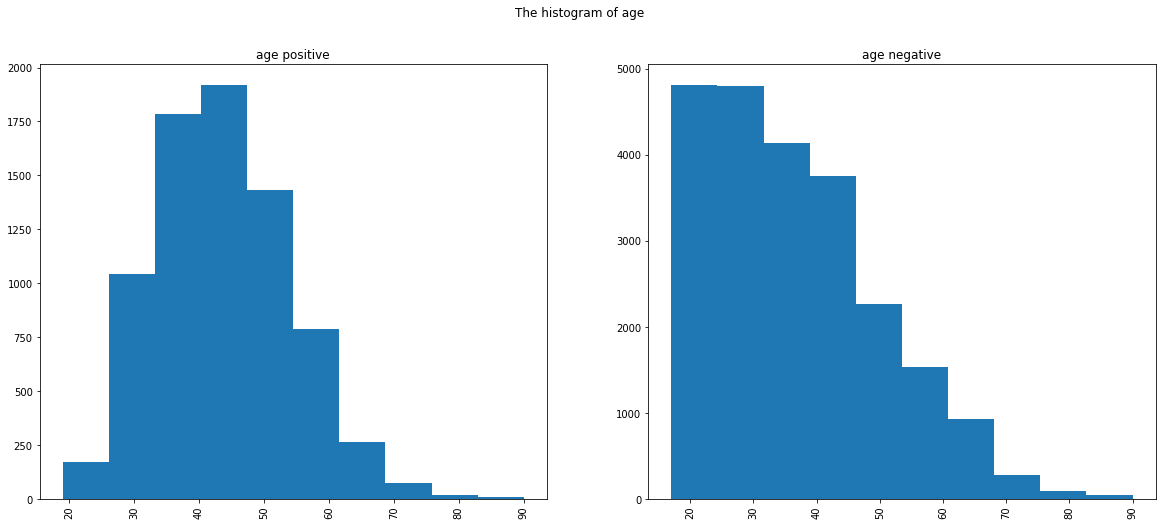

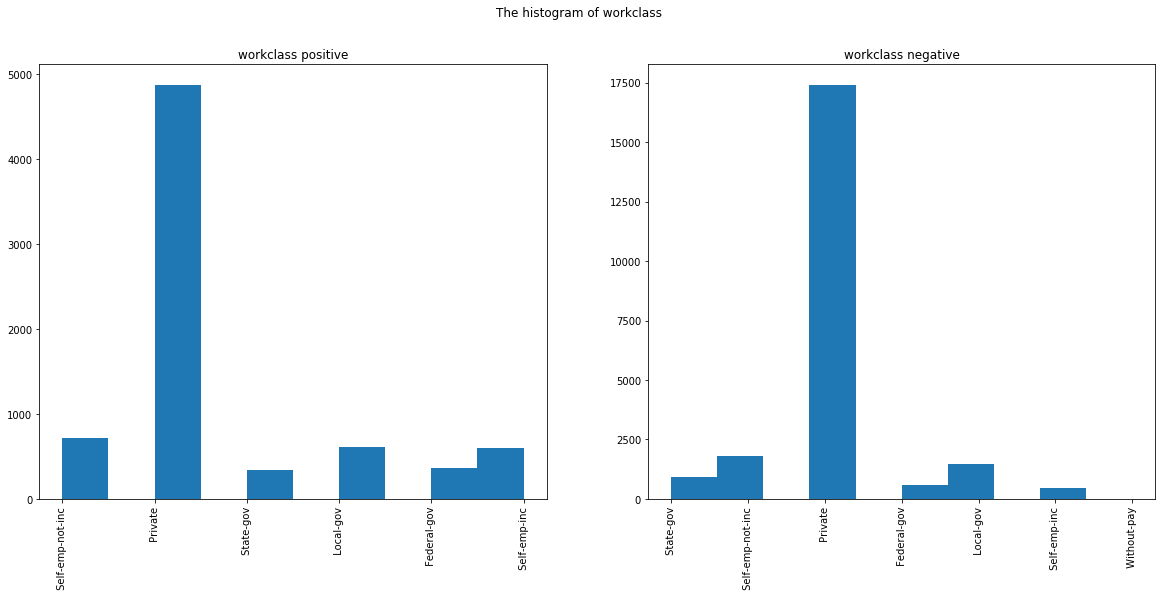

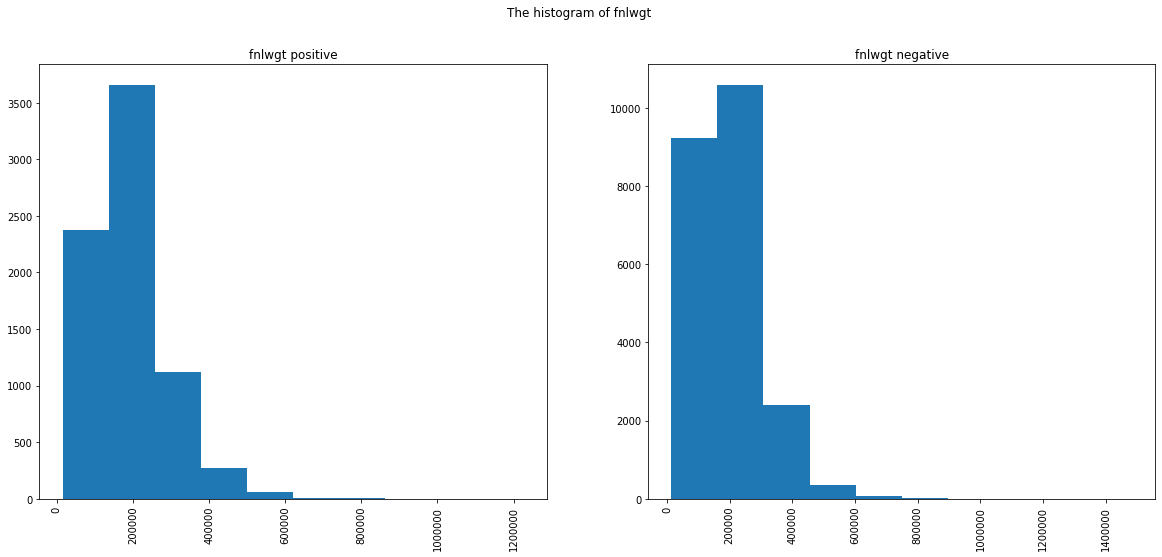

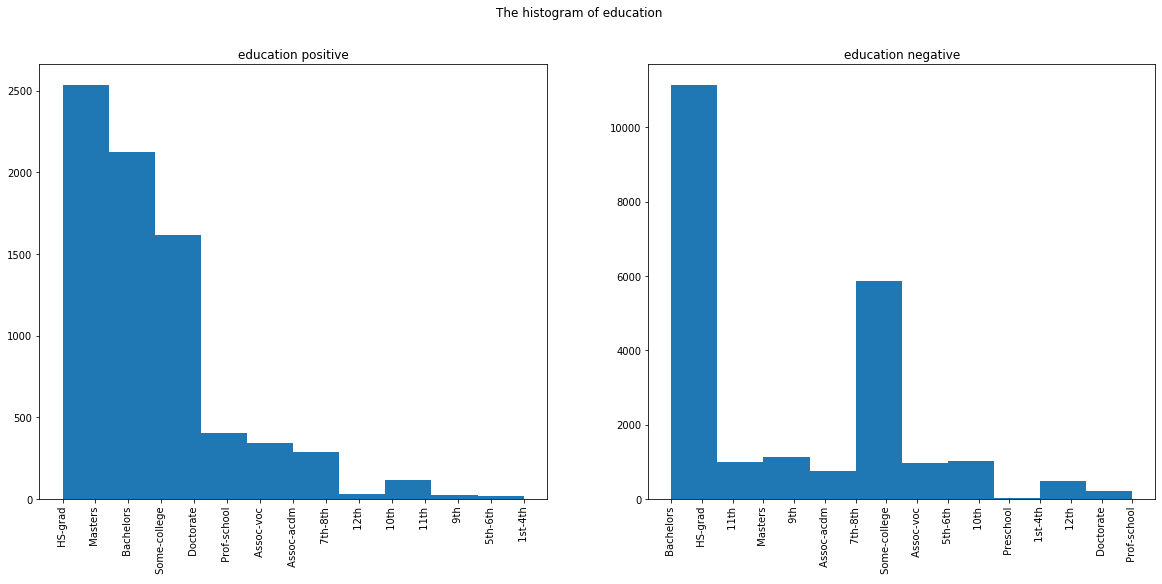

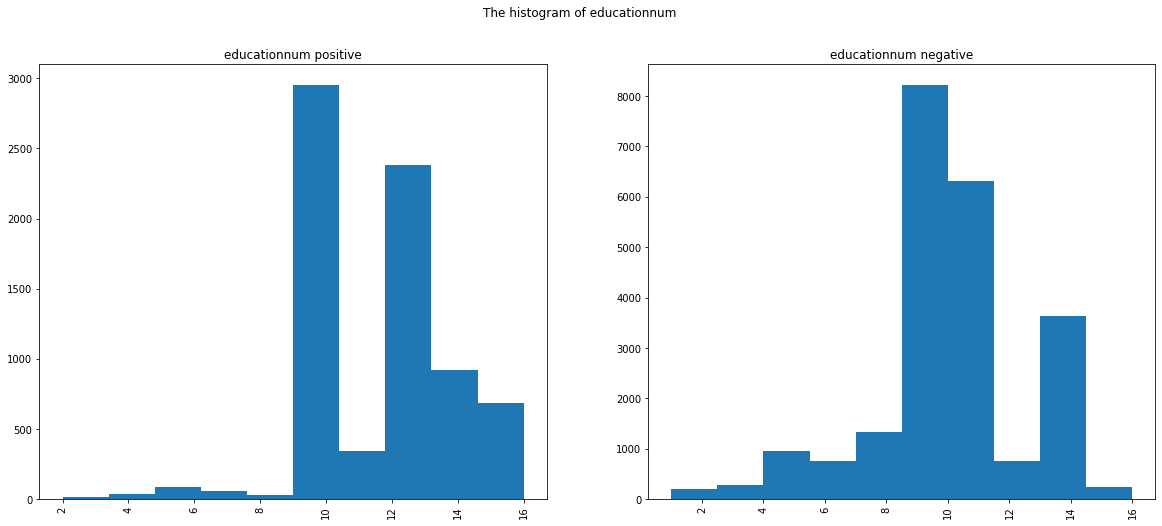

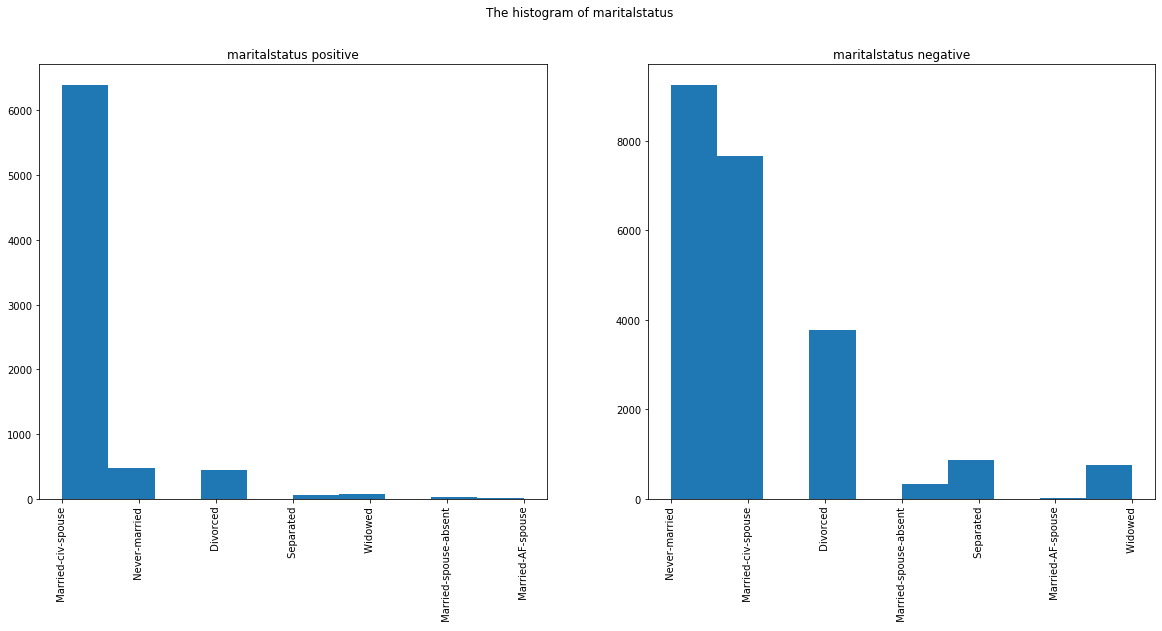

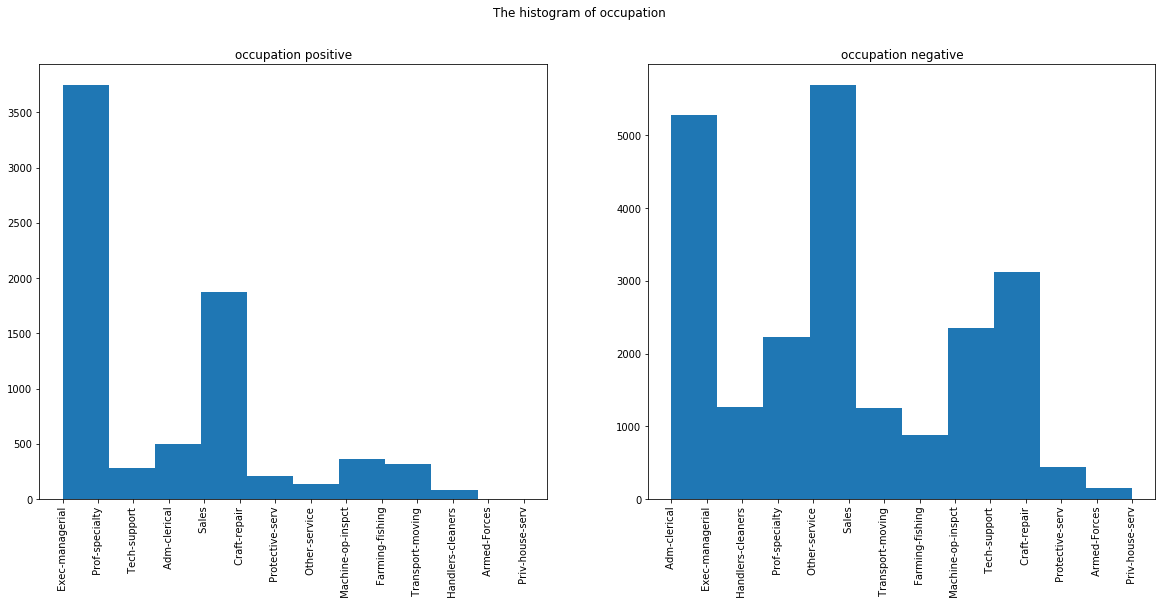

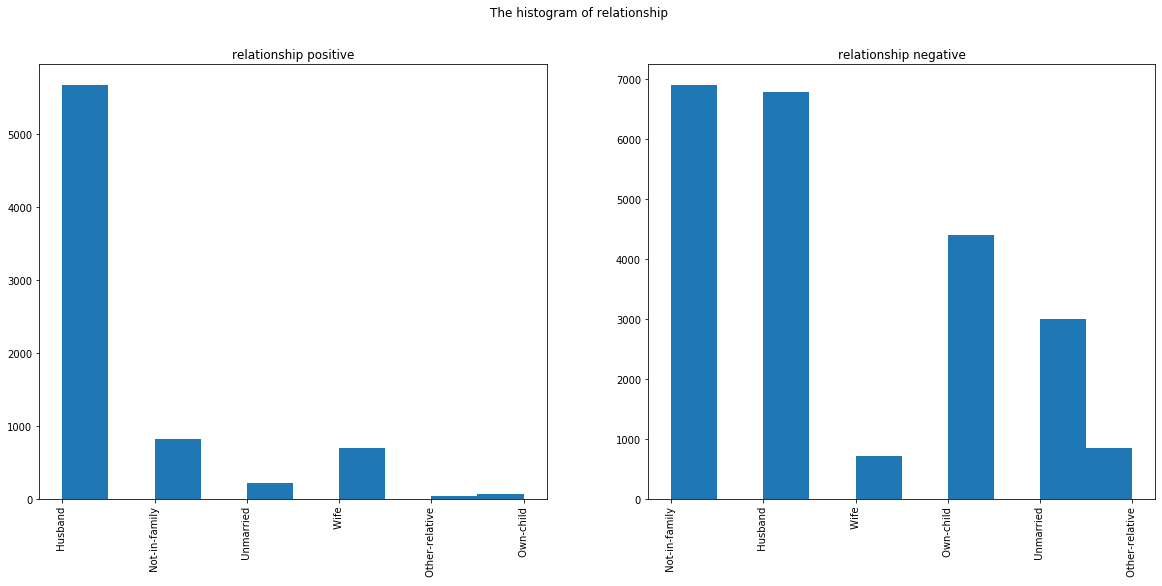

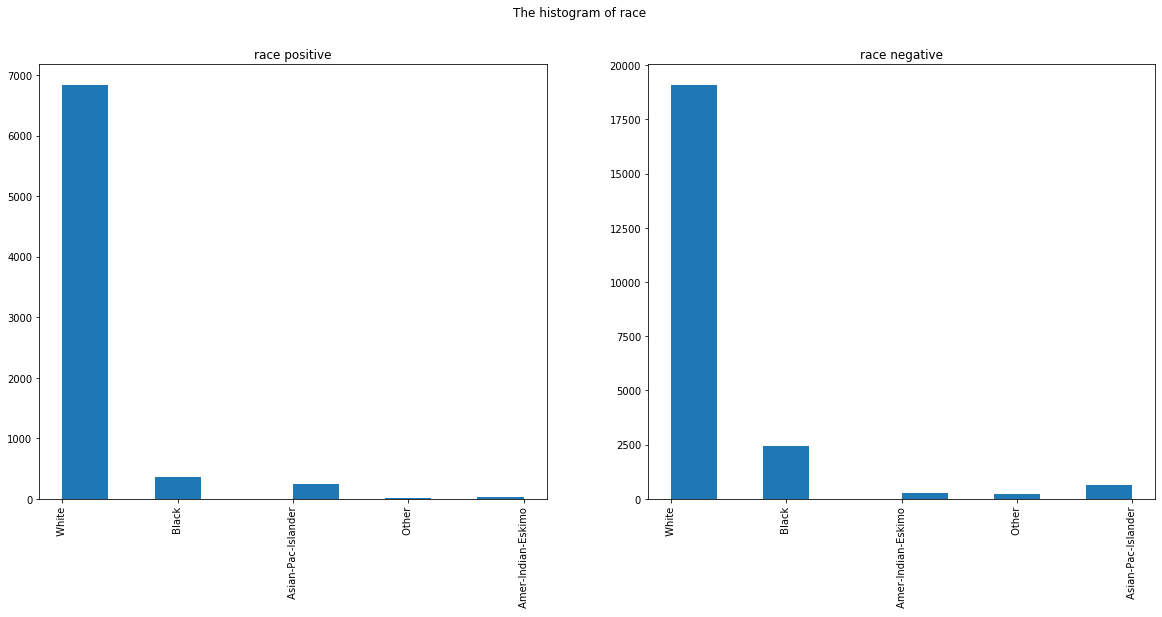

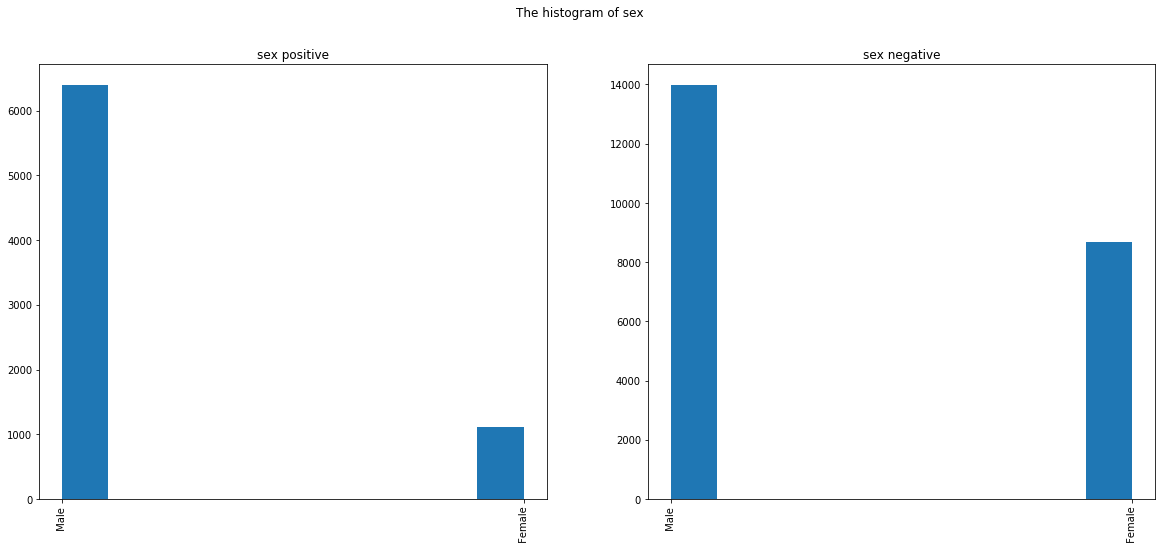

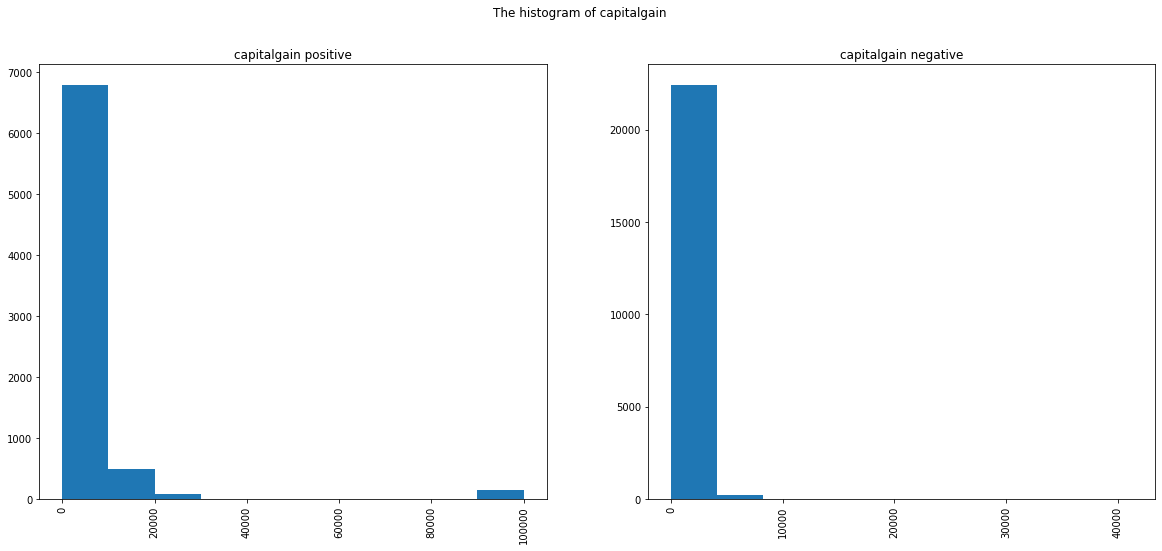

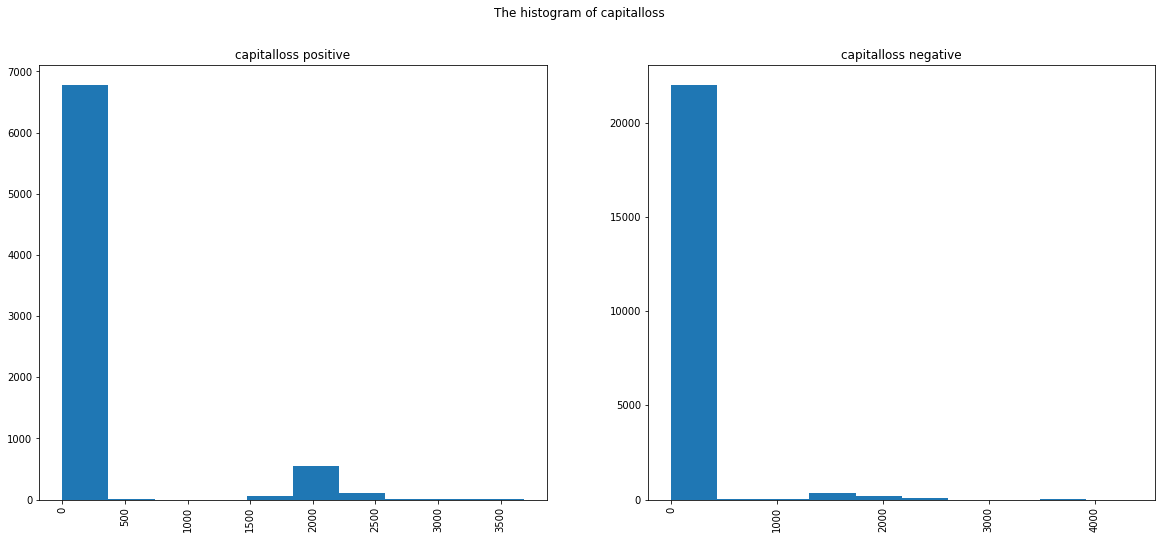

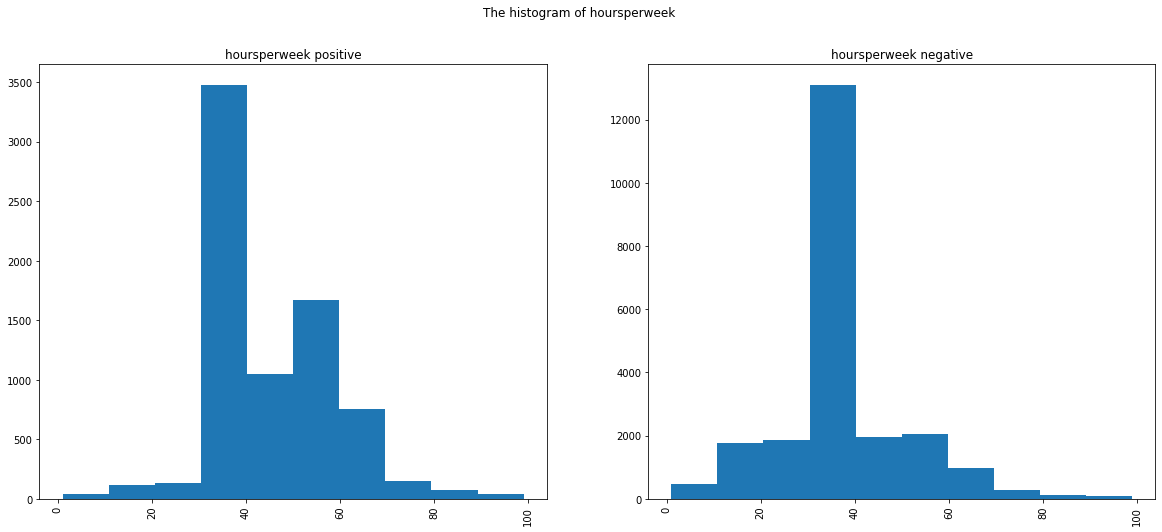

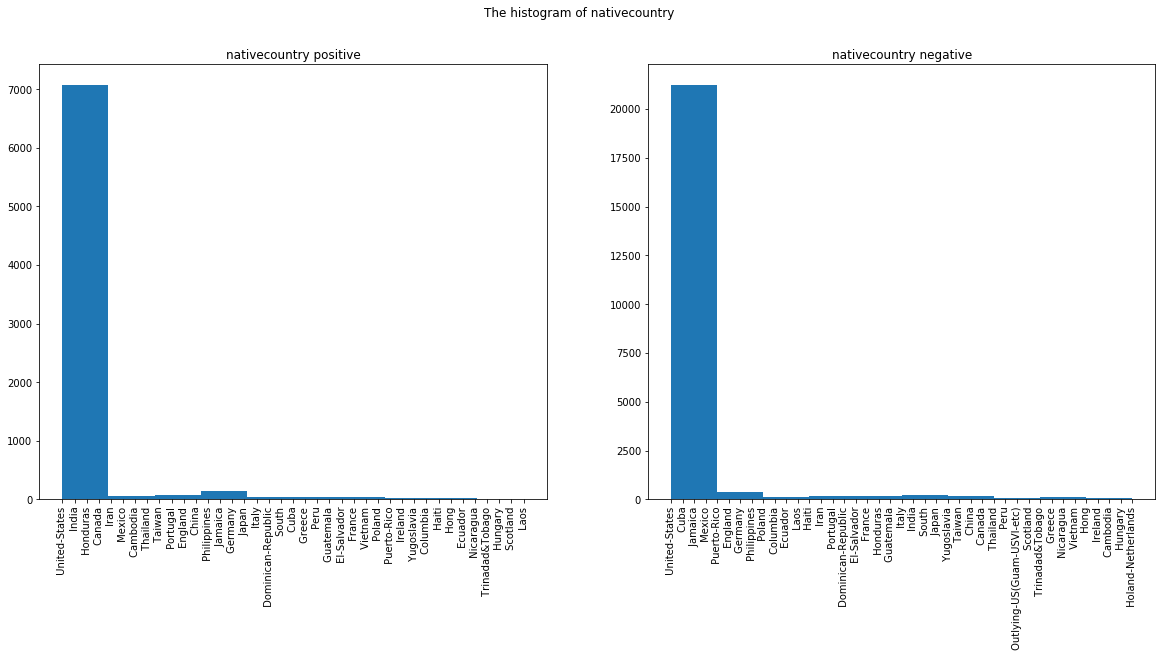

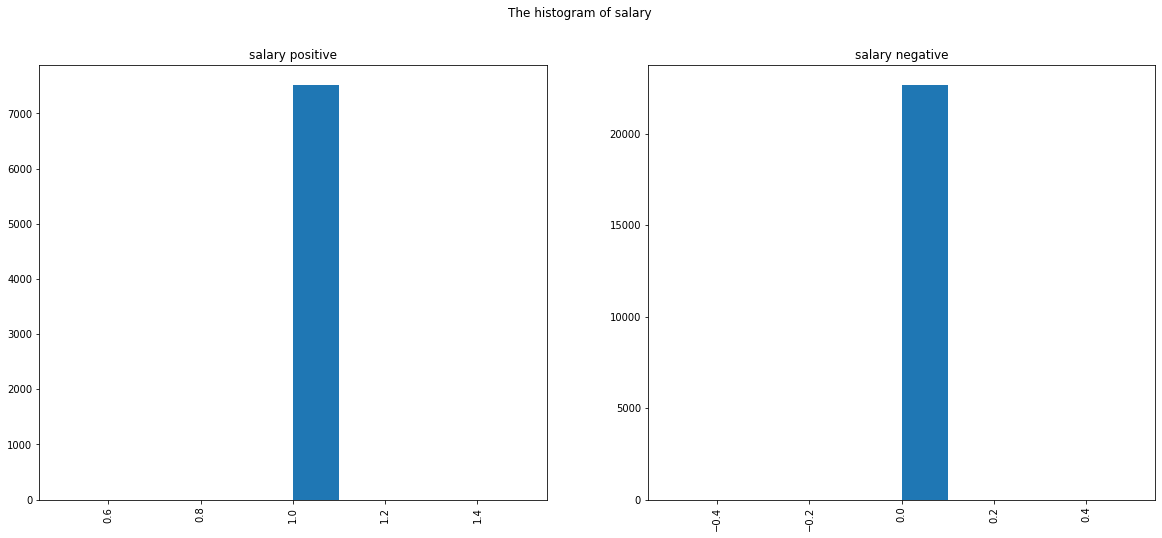

In [4]:
negative1,positive1=preprocess.data_analysis(content.as_matrix(),15)
preprocess.draw_hist(content, positive1,negative1, 'Dataset2_Distribution_plots') #Draw histograms

## 2. Evaluate Model Performance - Logistic Regression

#### Implementing One Hot Encoding to convert words to number
(Function shown in Data_preprocess.py)

In [5]:
content_One_hot=preprocess.one_hot(content)

In [6]:
model = LogisticRegression()
num_feature = len(content_One_hot.keys()) - 1
content_x=np.matrix(content_One_hot.values[:, range(num_feature-8)])
content_y = np.array(content_One_hot.values[:, num_feature])
def shuffle_data(X, y):
    data = np.hstack((X, np.matrix(y).T))
    np.random.shuffle(data)
    X = data[:, range(np.shape(data)[1]-1)]
    y = np.array(data[:, np.shape(data)[1]-1].T)[0]
    return X, y

In [7]:
X,y=shuffle_data(content_x,content_y)

In [ ]:
ls_set=[0.01 / y.shape[0],0.0001,0.001,0.005]
epsilon_set=[0.005]
max_iters = [5000]
acct=[]
pred=[]
iteration=[]
for i in range(len(ls_set)):
    for j in range(len(epsilon_set)):
        for max_iter in max_iters:
            acc,weight,predict=k_fold_crossv.k_fold_validation(LogisticRegression,X,y,5,ls_set[i],epsilon_set[j],max_iter)
            acct.append(acc)
            pred.append(predict)
print('acc',acct)


5000
5000
5000
5000
5000
3355
3099
3037
3329
3412
5000
5000
5000
5000
5000


In [ ]:
max_iters = [i for i in range(100, 5000, 200)]
plt.title('Dataset2 acc vs max iterations')
plt.xlabel('max iteration')
plt.ylabel('accuracy')
plt.plot(ls_set, acct)

In [ ]:
model = LogisticRegression()
model = k_fold_crossv.fitModelWithValidate(model, X,np.matrix(y).T, 0.2, 0.1 / X.shape[0],0.0005,10000)

In [ ]:
plt.figure(num=None, figsize=(10,6))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.title('DATASET2: Training Dataset Errors vs Max Iterations')
plt.xlabel('Max Iteration')
plt.ylabel('Errors')
plt.plot(model.report.epochs, model.report.errors)
plt.savefig("Dataset2_Training_error_vs_maxiter.png", dpi = 300)

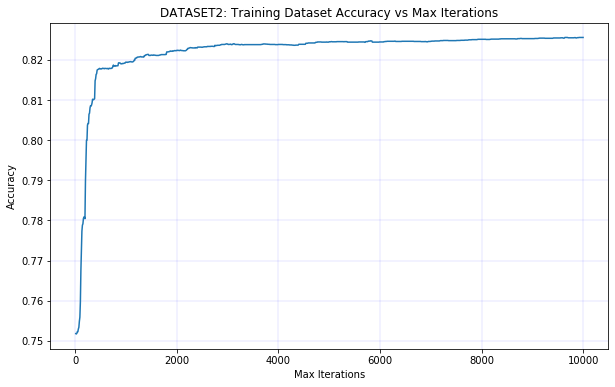

In [30]:
plt.figure(num=None, figsize=(10,6))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.title('DATASET2: Training Dataset Accuracy vs Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.plot(model.report.epochs, model.report.accs)
plt.savefig("Dataset2_Training_Accuracy_vs_maxiter.png", dpi = 300)

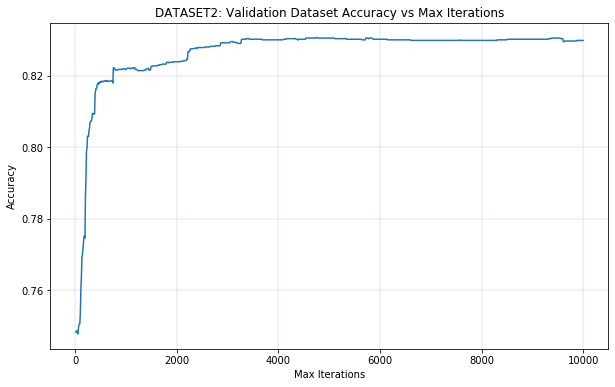

In [31]:
plt.figure(num=None, figsize=(10,6))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.title('DATASET2: Validation Dataset Accuracy vs Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.plot(model.report.epochs, model.report.val_accs)
plt.savefig("Dataset2__Validation_Accuracy_vs_maxiter.png", dpi = 300)

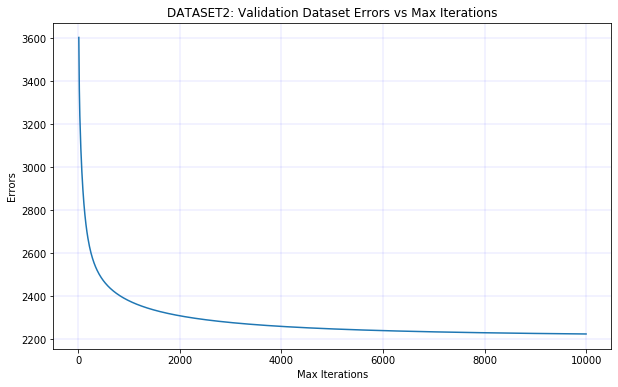

In [32]:
plt.figure(num=None, figsize=(10,6))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.title('DATASET2: Validation Dataset Errors vs Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Errors')
plt.plot(model.report.epochs, model.report.val_errors)
plt.savefig("Dataset2__Validation_Errors_vs_maxiter.png", dpi = 300)

In [12]:
Train_vali

[[0.8100132625994695],
 [0.8100132625994695],
 [0.8100132625994695],
 [0.8086870026525199],
 [0.8080238726790451],
 [0.7805039787798409]]

In [ ]:
from sklearn.naive_bayes import BernoulliNB
acc = k_fold_crossv.k_fold_validation_naive_bayes(BernoulliNB,X,y, 5, 1)

In [ ]:
acc